In [ ]:
#importing libraries
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
random_seed = 12342

import tensorflow as tf
import keras

In [ ]:
!pip3 install ktrain
import ktrain
from ktrain import text
from ktrain.preprocessor import Preprocessor

     |████████████████████████████████| 25.3 MB 64 kB/s 
     |████████████████████████████████| 6.8 MB 33.4 MB/s 
     |████████████████████████████████| 981 kB 33.4 MB/s 
     |████████████████████████████████| 263 kB 47.2 MB/s 
     |████████████████████████████████| 2.8 MB 33.1 MB/s 
     |████████████████████████████████| 1.2 MB 45.3 MB/s 
     |████████████████████████████████| 468 kB 44.6 MB/s 
     |████████████████████████████████| 3.3 MB 34.7 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 41.3 MB/s 
     |████████████████████████████████| 895 kB 40.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.2-py3-none-any.whl size=25290606 sha256=544f5925089c5ae09ff8bc7fcf956c544a2f5e338b21343a1772cc7dec9dfb3c
  Stored in directory: /root/.cache/pip/wheels/df/2b/04/7c821b51e637ec480060989b5030d0c4cce16efe0d67bff94b
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=e4d7097bbef472ce0

In [ ]:
#importing dataset
tqdm.pandas()
df = pd.read_excel('dataset/annotated_reviews.xlsx')
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df = df.sample(frac = 1).reset_index(drop=True)

In [ ]:
#Running for only for only pos and neg category, dont run this part if u want to include neutral.
df = df.loc[df["category"]!='neutral']
df["category"].value_counts()

positive    3051
negative    2585
Name: category, dtype: int64

In [ ]:
df.head()

,review,rating,category
0,"Brain trace বিশ্বের অন্যতম সেরা লেখক , গবেষক, ...",5,positive
1,ইদানীং ধর্মের স্বপক্ষে কিছুটা সৃজনশীল ধাচের বই...,0,negative
2,ভারতের ইংরেজীভাষী লেখকদের মধ্যে সবচেয়ে জনপ্রিয়...,3,positive
3,অসাধারণ একটি বই। তুরস্কের কমিউনিস্টদের উপর নির...,5,positive
4,বইয়ের নামে ভূল। রাসুলুল্লাহ (সাঃ) এর নামায হবে...,0,negative


In [ ]:
#describe dataset
reviews_lengths = pd.Series([len(x.split()) for x in df["review"].apply(str)])
reviews_lengths.describe()

count    5636.000000
mean       84.008694
std       144.791201
min         1.000000
25%         6.000000
50%        22.000000
75%        83.000000
max      1514.000000
dtype: float64

In [ ]:
#selecting reviews with length less than n=300
df = df[df['review'].apply(lambda x: len(x.split()) <= 300)]

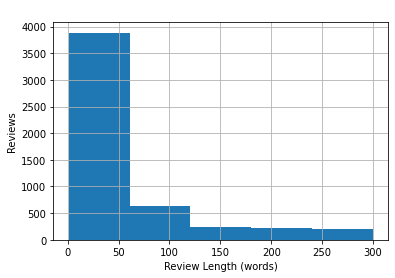

In [ ]:
#Here, we will analyze the length of the reviews and the summary to get an overall idea about the distribution of length of the text.
#This will help us fix the maximum length of the sequence:
 
import matplotlib.pyplot as plt
text_word_count = []
 
# populate the lists with sentence lengths
for i in df['review']:
      text_word_count.append(len(i.split()))
 
length_df = pd.DataFrame({' ':text_word_count})
length_df.hist(bins=5)
plt.xlabel('Review Length (words)')
plt.ylabel('Reviews')
#plt.savefig('/content/drive/MyDrive/ColabWorks/BookReview/datadist.jpeg', dpi=1200)
plt.show()

In [ ]:
# Counting number of samples on each category
df["category"].value_counts()

positive    2649
negative    2540
Name: category, dtype: int64

In [ ]:
# converting dataframe columns into individual lists
reviews_text = list(df["review"].apply(str))
categories = list(df["category"].apply(str))
ratings = list(df["rating"].apply(int))

In [ ]:
# Labeling the categories into 0 and 1

label = LabelBinarizer().fit_transform(categories)

In [ ]:
# for converting whole dataset into train, validation and test

x_train, temp_text, y_train, temp_labels = train_test_split(reviews_text, categories, 
                                                                    random_state=random_seed, 
                                                                    test_size=0.2,
                                                                    stratify= categories 
                                                                    )

# we will use temp_text and temp_labels to create validation and test set
x_val, x_test, y_val, y_test = train_test_split(temp_text, temp_labels, 
                                                                random_state=random_seed, 
                                                                test_size=0.5, 
                                                                stratify= temp_labels
                                                                )

In [ ]:
# No. of samples of each category in train_set
print(pd.Series(y_train).value_counts())

# No. of samples of each category in test_set
print(pd.Series(y_test).value_counts())


positive    2376
negative    2277
dtype: int64
positive    273
negative    263
dtype: int64


In [ ]:
# Uncomment the name of the model that you want to fine tune and comment out the rest

MODEL_NAME = 'bert-base-multilingual-cased'
#MODEL_NAME = 'xlm-roberta-base'
#MODEL_NAME = 'sagorsarker/bangla-bert-base'
category_names = ['negative','positive']
t = text.Transformer(MODEL_NAME, maxlen= 300, class_names=category_names)

In [ ]:
# Coverting text to numeric values 
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

# get preprocessor for the learner in ktrain
preproc = t.get_preprocessor()

preprocessing train...
language: bn
train sequence lengths:
	mean : 48
	95percentile : 223
	99percentile : 280


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:616: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 52
	95percentile : 228
	99percentile : 277


In [ ]:
# setting up the learner

model = t.get_classifier()

#freezing pretrained bert weights making it non-trainable.
model.layers[0].trainable = False  


learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  177853440 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 177,854,978
Trainable params: 1,538
Non-trainable params: 177,853,440
_________________________________________________________________


In [ ]:
#learner.lr_find()

# fine tune the learner

#learner.reset_weights(verbose=0)
learner.fit_onecycle(1e-5,4)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/4
291/291 [==============================] - 635s 2s/step - loss: 0.5620 - accuracy: 0.7234 - val_loss: 0.4988 - val_accuracy: 0.7948
Epoch 2/4
291/291 [==============================] - 610s 2s/step - loss: 0.4337 - accuracy: 0.8085 - val_loss: 0.3831 - val_accuracy: 0.8265
Epoch 3/4
291/291 [==============================] - 612s 2s/step - loss: 0.3334 - accuracy: 0.8635 - val_loss: 0.3092 - val_accuracy: 0.8657
Epoch 4/4
291/291 [==============================] - 610s 2s/step - loss: 0.2360 - accuracy: 0.9119 - val_loss: 0.3069 - val_accuracy: 0.8713


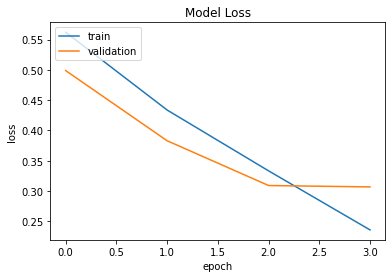

In [ ]:
learner.plot()

In [ ]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       241
    positive       0.88      0.89      0.88       295

    accuracy                           0.87       536
   macro avg       0.87      0.87      0.87       536
weighted avg       0.87      0.87      0.87       536



array([[204,  37],
       [ 32, 263]])

In [ ]:
#saving fine tuned model
#learner.save_model("finetuned_mBert.h5")

#loading model 
#learner.load_model('finetuned_mBert.h5')

In [ ]:
# get the predictor
m_predictor = ktrain.get_predictor(learner.model,t)

In [ ]:
# Checking if our model can predict the first 5 samples of test data

# The binarized labels of test data
label_test = label[-536:]

pred = []
for i in x_test:
  if m_predictor.predict(i) == 'negative':
    pred.append(0)
  else: 
    pred.append(1)

In [ ]:
print(y_test[0:5]) #showing the labels of first 5 samples on test data
print(label_test[0:5]) #showing the binarized labels of first 5 samples 
print(pred[:5])   #showing the predicted labels of first 5 samples

['negative', 'positive', 'negative', 'positive', 'positive']
[[0]
 [1]
 [0]
 [1]
 [1]]
[0, 1, 0, 1, 1]
